# Phonon Calculation

_Run this notebook directly in your browser through Binder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/runner-suite%2Frunnerase-usage-environment/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgitlab.com%252Frunner-suite%252Frunnerase-usage%26urlpath%3Dtree%252Frunnerase-usage%252Fapplication_phonon.ipynb%26branch%3Dmain)_

This example demonstrates how to perform a Phonon calculation using runnerase as the calculator. It is adapted from the basic example in the ASE documentation.

<div class="admonition danger">
    <p class="admonition-title">Unreasonable Results</p>
    <p>
        This notebook is only meant as an example. The potential we use has not been trained and evaluated for the calculation of phonons. The results should be read with caution! 
    </p>
</div>

## General Setup

In [1]:
import matplotlib.pyplot as plt

from ase.io import read, write
from ase.phonons import Phonons

from runnerase.calculators.runner import Runner

We initialize a calculator from a previous calculation.

In [2]:
RUNNER_CMD = 'ulimit -s unlimited; runner1 > PREFIX.out'
calc = Runner(
    command=RUNNER_CMD,
    restart='data/mode3/mode3'
)

## Run the phonon calculation

We choose one structure from the dataset for the phonon calculation. The calculator label is changed so that the calculation will be recorded in a new folder and finally the loaded calculator is attached to the structure.

In [3]:
atoms = calc.dataset[1].copy()
calc.label = 'phonon/phonon'
calc.profile.prefix = calc.prefix

atoms.calc = calc

Finally, we set up the Phonon calculator and run the calculation (warning, this can run for a few minutes)

In [4]:
# Phonon calculator
N = 3
ph = Phonons(atoms, calc, supercell=(N, N, N), delta=0.05)
ph.run()

# Read forces and assemble the dynamical matrix
ph.read(acoustic=True)
ph.clean()

path = atoms.cell.bandpath(npoints=100)
bs = ph.get_band_structure(path)

dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

## Band Structure and DOS

We can plot the band structure and DOS:

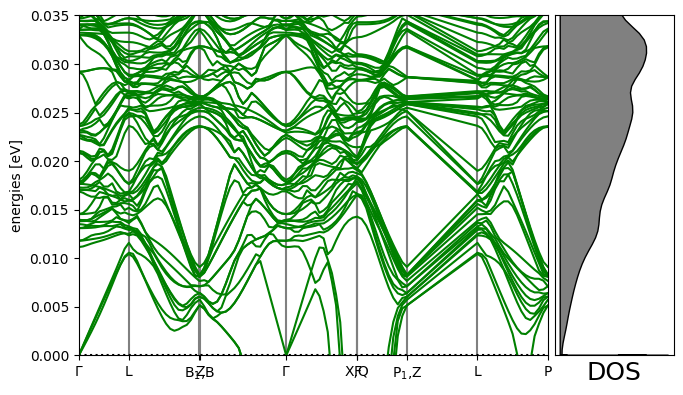

In [15]:
# Plot the band structure and DOS.
fig = plt.figure(1, figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.035
bs.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos.get_weights(), dos.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

plt.show()